# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport

### Options

In [31]:
%matplotlib inline
pd.set_option('display.max_columns', 500)
sns.set(style='whitegrid')

# Read Data

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9177,2591010150,20150414T000000,405000.0,2,1.75,1350,2653,2.0,0,0,3,7,1350.0,0,1986,0,98033,47.6934,-122.184,1370,4115
7641,3574801490,20140609T000000,385000.0,3,1.75,1230,7500,1.0,0,0,3,7,1230.0,0,1987,0,98034,47.7316,-122.224,1930,8747
653,2324039036,20150403T000000,597500.0,3,2.00,2150,5400,1.5,0,0,4,7,1380.0,770,1911,0,98126,47.5550,-122.379,1940,6500
13024,9211500620,20150428T000000,305000.0,3,2.25,1740,6650,1.0,0,0,3,7,1240.0,500,1978,0,98023,47.2979,-122.379,1740,7000
3354,7518508625,20150416T000000,900000.0,3,1.00,1560,3825,1.5,0,0,3,8,1390.0,170,1930,0,98117,47.6803,-122.387,1700,5100
6352,9358002232,20141019T000000,380000.0,3,2.00,1470,1656,2.0,0,0,3,8,1310.0,160,2003,0,98126,47.5653,-122.369,1470,2288
21160,9532000500,20140801T000000,415000.0,3,2.50,1610,3600,2.0,0,0,3,8,1610.0,0,2010,0,98072,47.7710,-122.169,2210,3600
15431,7855300460,20140923T000000,1000000.0,3,2.75,2370,8900,1.0,0,4,4,9,1670.0,700,1971,0,98006,47.5648,-122.156,2840,8956
20882,2738640040,20150409T000000,644000.0,4,2.50,3310,4839,2.0,0,0,3,9,3310.0,0,2007,0,98072,47.7730,-122.161,3240,5280
6650,1196000007,20140505T000000,384900.0,5,2.50,3090,12750,1.0,0,0,3,8,1750.0,1340,1968,0,98023,47.3408,-122.335,1760,25919


# EDA

### EDA with Pandas Profiling

In [5]:
# report = ProfileReport(df)
# report.to_file('kc_house_data_report.html')

## Check Data Types

In [45]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

<AxesSubplot:xlabel='date'>

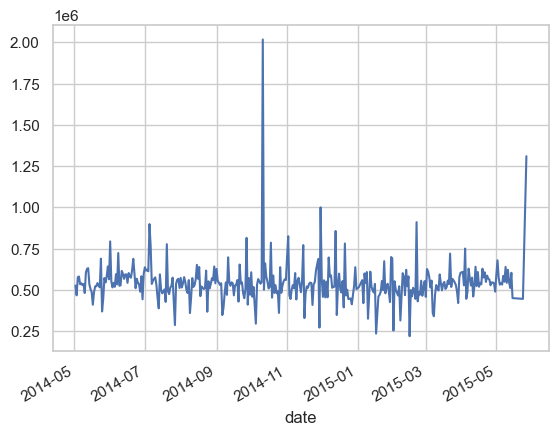

In [32]:
df[['date', 'price']].groupby('date')['price'].mean().plot()

# Missing Values

In [44]:
pd.DataFrame(df.isna().sum(), columns=['Number of Missing Values']).style.background_gradient()

,Number of Missing Values
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [43]:
df[df['sqft_above'].isna() == True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,1736800520,2015-04-03,662500.0,3,2.5,3560,9796,1.0,0,0,3,8,NaN,1700,1965,0,98007,47.6007,-122.145,2210,8925
17,6865200140,2014-05-29,485000.0,4,1.0,1600,4300,1.5,0,0,4,7,NaN,0,1916,0,98103,47.6648,-122.343,1610,4300


# Outlier & Anomaly

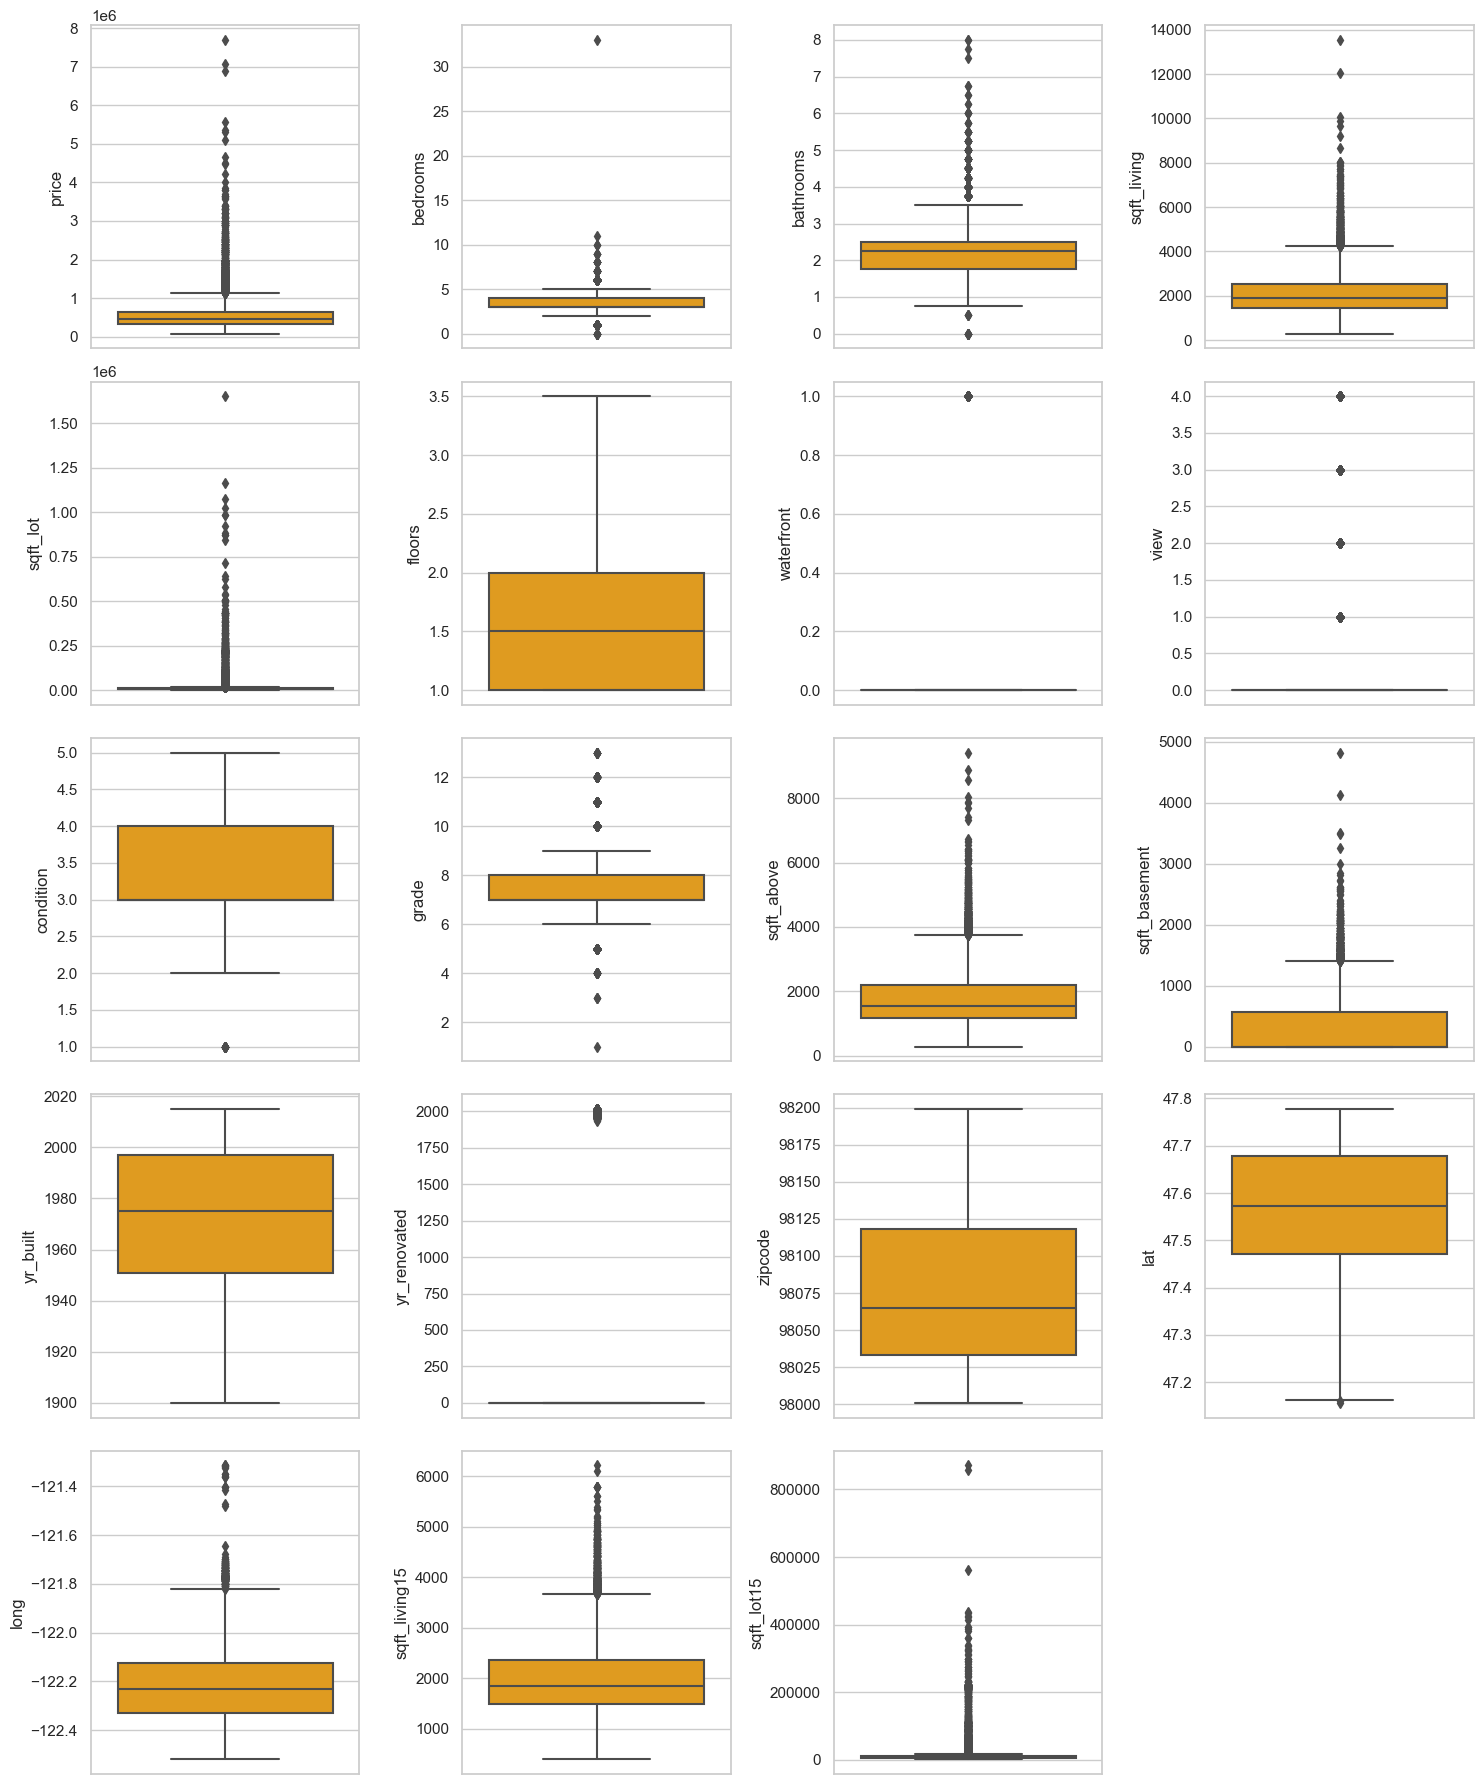

In [77]:

plt.figure(figsize=(15,18))
for i , col in enumerate(df.columns[2:]):
    plt.subplot(5,4,i+1)
    g = sns.boxplot(y=col, data=df, color='#ffa400')
    
plt.tight_layout()
plt.show()

In [ ]:
# sns.displot(data=df)

# Data Preprocessing

# Model